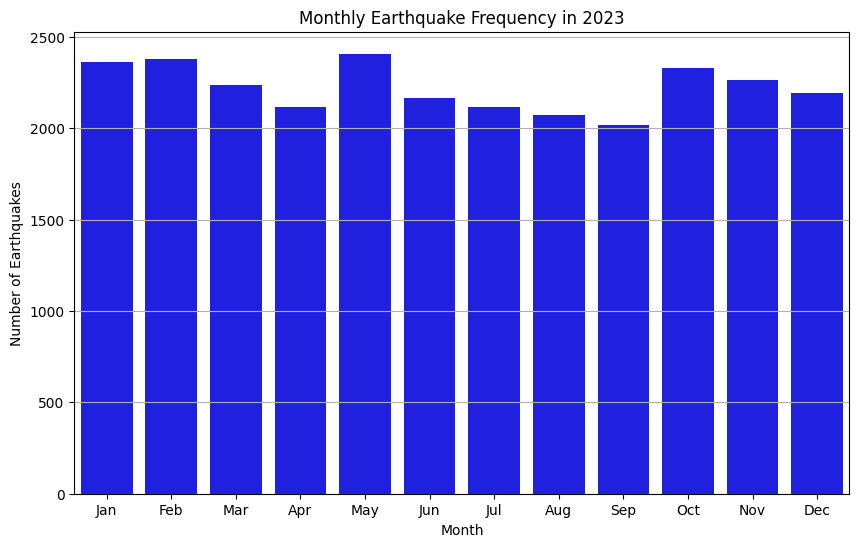

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\mlawal\\Downloads\\Dissertation Papers\\archive\\earthquakes_2023_global.csv"
earthquake_data = pd.read_csv(file_path)

# Convert the 'time' column to datetime format
earthquake_data['time'] = pd.to_datetime(earthquake_data['time'])

# Extract month from the datetime
earthquake_data['month'] = earthquake_data['time'].dt.month

# Count the number of earthquakes per month
monthly_earthquake_counts = earthquake_data['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_earthquake_counts.index, y=monthly_earthquake_counts.values, color='blue')
plt.title('Monthly Earthquake Frequency in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


C:\Users\mlawal\AppData\Local\Temp\ipykernel_328\2063607666.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


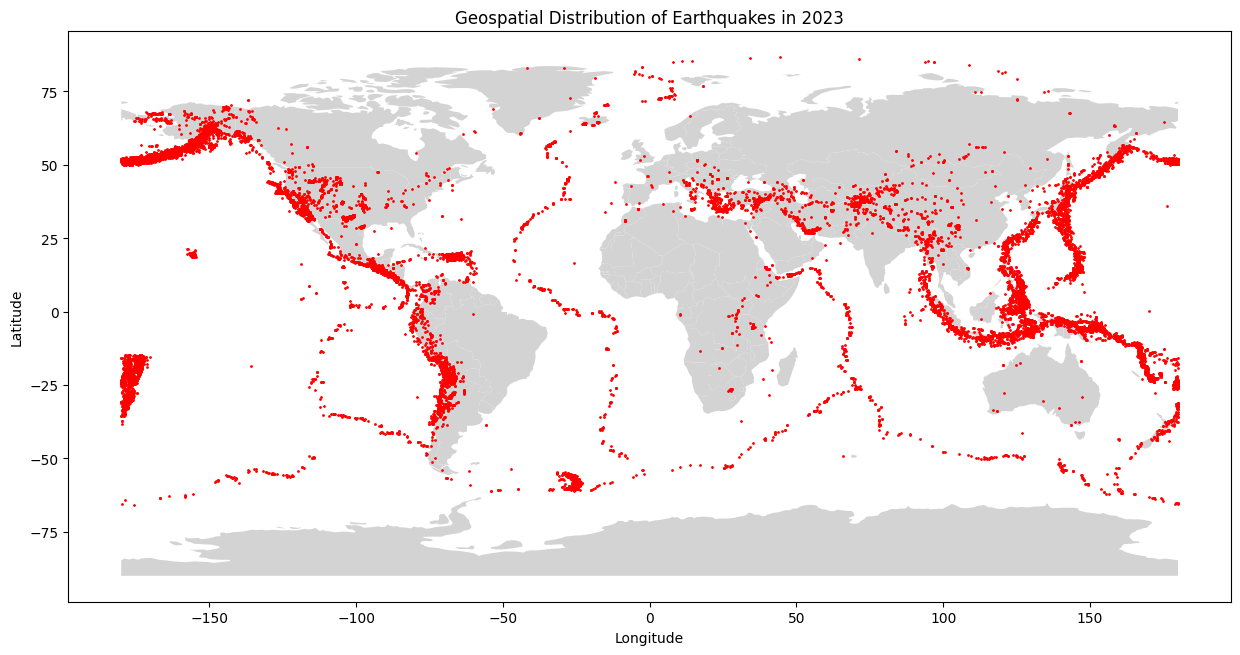

In [4]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the longitude and latitude to a GeoDataFrame
gdf = gpd.GeoDataFrame(earthquake_data, geometry=gpd.points_from_xy(earthquake_data.longitude, earthquake_data.latitude))

# World basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
plt.figure(figsize=(15, 10))
world.plot(ax=plt.gca(), color='lightgrey')
gdf.plot(ax=plt.gca(), markersize=1, color='red')
plt.title('Geospatial Distribution of Earthquakes in 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


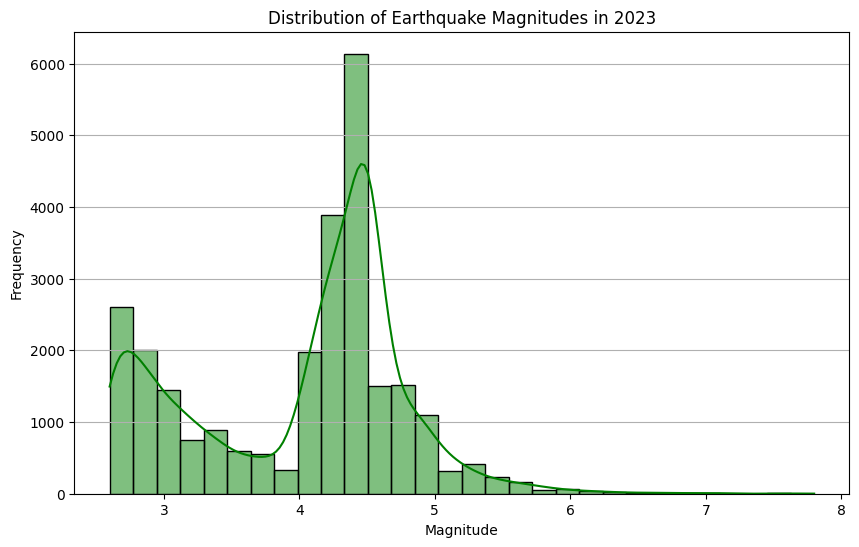

In [5]:
# Plotting the distribution of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_data['mag'], bins=30, kde=True, color='green')
plt.title('Distribution of Earthquake Magnitudes in 2023')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


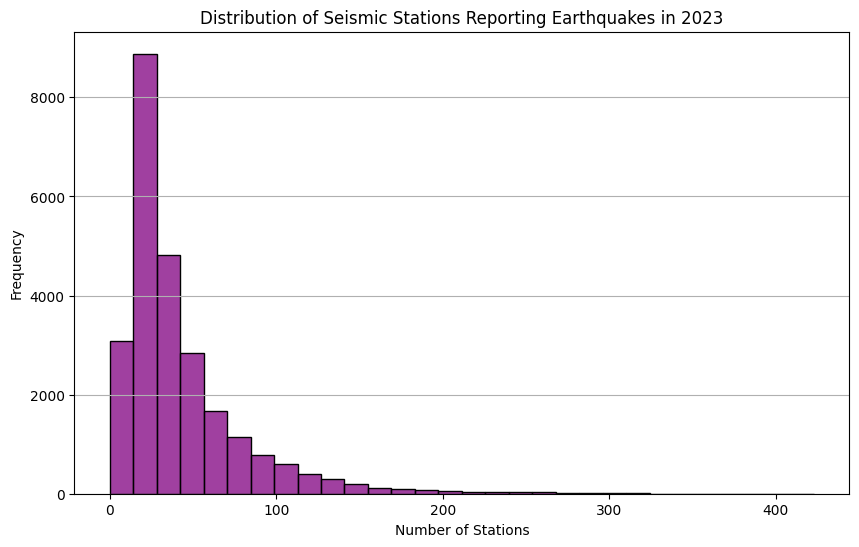

In [6]:
# Analyzing the number of stations (nst) reporting each earthquake
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_data['nst'].dropna(), bins=30, color='purple')
plt.title('Distribution of Seismic Stations Reporting Earthquakes in 2023')
plt.xlabel('Number of Stations')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


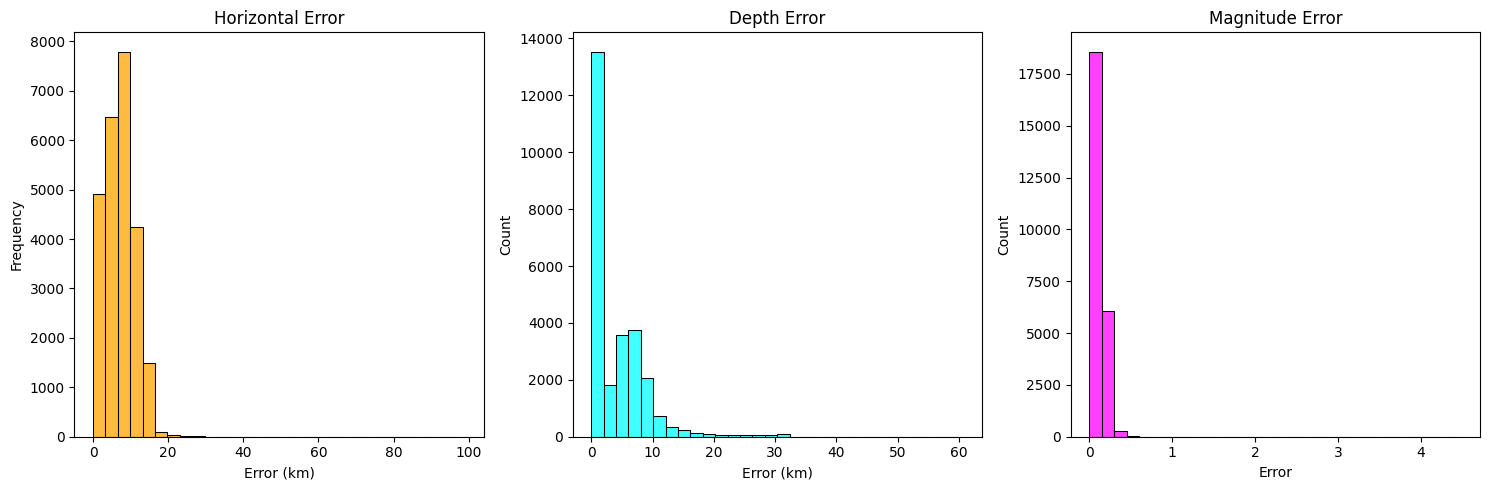

In [7]:
# Plotting errors in location, depth, and magnitude
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(earthquake_data['horizontalError'].dropna(), bins=30, ax=ax[0], color='orange')
ax[0].set_title('Horizontal Error')
ax[0].set_xlabel('Error (km)')
ax[0].set_ylabel('Frequency')

sns.histplot(earthquake_data['depthError'].dropna(), bins=30, ax=ax[1], color='cyan')
ax[1].set_title('Depth Error')
ax[1].set_xlabel('Error (km)')

sns.histplot(earthquake_data['magError'].dropna(), bins=30, ax=ax[2], color='magenta')
ax[2].set_title('Magnitude Error')
ax[2].set_xlabel('Error')

plt.tight_layout()
plt.show()
